In [8]:
import math 
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

Имеем задачу:
\begin{array}{l}
u_{t t}^{\prime \prime}(x, t)=u_{x x}^{\prime \prime}(x, t), \quad 0 \leq x \leq 1, \quad 0 \leq t \leq 1 \\
u(0, t)=\frac{1}{t+a}, \quad u(1, t)=\frac{1}{t+a+1}, \quad 0 \leq t \leq 1 \\
u(x, 0)=\frac{1}{x+a}, \quad u_{t}^{\prime}(x, 0)=-\frac{1}{(x+a)^{2}}, \quad 0 \leq x \leq 1 \\
a=0.5+0.1 k(k=0,1, \ldots, 10)
\end{array}

Будем использовать разностную схему "Крест":

$$\frac{y_{m}^{n+1}-2 y_{m}^{n}+y_{m}^{n-1}}{\tau^{2}}-\frac{y_{m-1}^{n}-2 y_{m}^{n}+y_{m+1}^{n}}{h^{2}}=0$$

Она устойчива при $\tau < h$. При решении мы возьмём $\tau = \frac{h}{2}$.

In [9]:
u = np.zeros((201, 101))
h = 0.01
t = h / 2
a = 0.5
for i in range(201):
    u[i][0] = 1/(t * i + a)
    u[i][100] = 1/(t * i + a + 1)
for j in range(1, 100):
    u[0][j] = 1/(j * h + a)
    u[1][j] = 1/(j * h + a) - t * (1/(h * j + a) ** 2)
for i in range(2, 201):
    for j in range(1, 100):
        u[i][j] = 2 * u[i - 1][j] - u[i - 2][j] + 0.25 * (u[i - 1][j + 1] - 2 * u[i - 1][j] + u[i - 1][j - 1])


Строим решение для $a = 0.5$

<IPython.core.display.Javascript object>


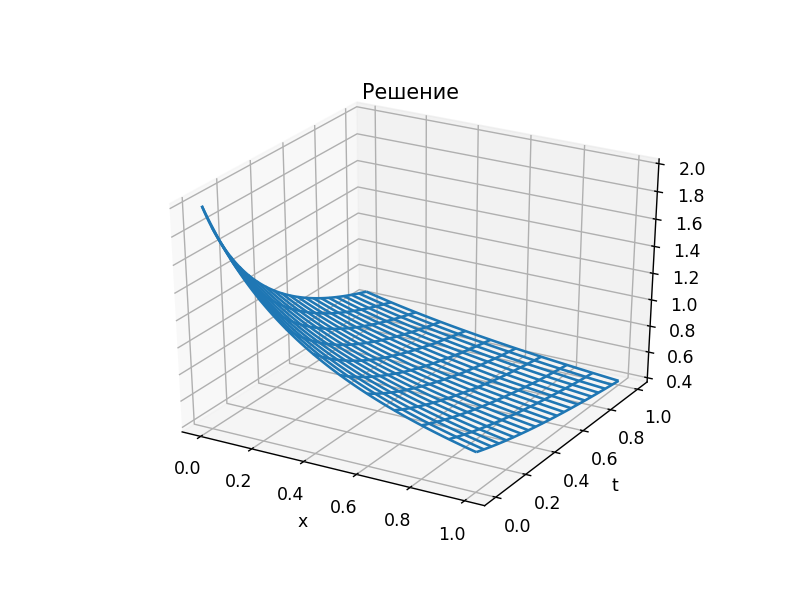

In [10]:
%matplotlib notebook

tm = np.linspace(0., 1., 201)
xn = np.linspace(0., 1., 101)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, u, rstride=10,cstride=10)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Далее, для сравнения просто проделаем всё то же для $a = 1.5$

In [13]:
u = np.zeros((201, 101))
h = 0.01
t = h / 2
a = 1.5
for i in range(201):
    u[i][0] = 1/(t * i + a)
    u[i][100] = 1/(t * i + a + 1)
for j in range(1, 100):
    u[0][j] = 1/(j * h + a)
    u[1][j] = 1/(j * h + a) - t * (1/(h * j + a) ** 2)
for i in range(2, 201):
    for j in range(1, 100):
        u[i][j] = 2 * u[i - 1][j] - u[i - 2][j] + 0.25 * (u[i - 1][j + 1] - 2 * u[i - 1][j] + u[i - 1][j - 1])


<IPython.core.display.Javascript object>


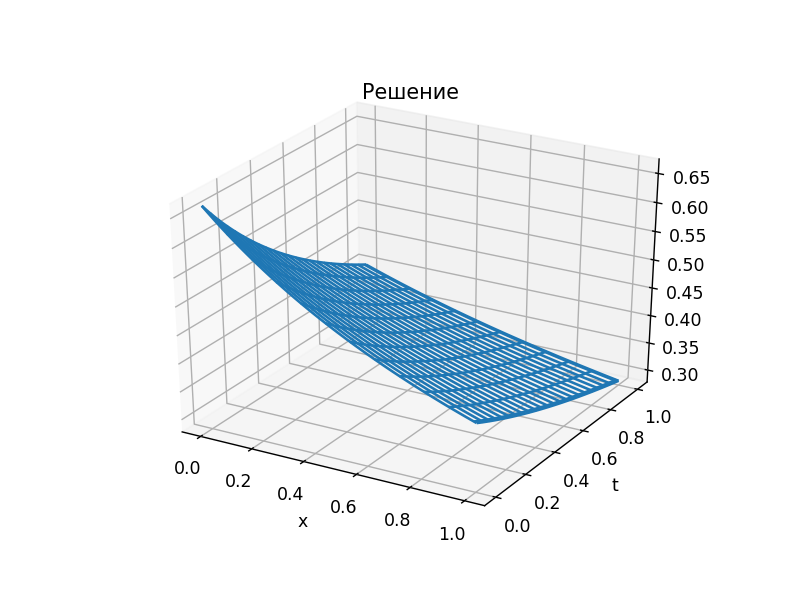

In [14]:
%matplotlib notebook

tm = np.linspace(0., 1., 201)
xn = np.linspace(0., 1., 101)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, u, rstride=9,cstride=9)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()